# K-Means Clustering

<ul>
    <li>Very popular unsupervised learning algorithm in data mining.</li>
    <li>Automatically divides the data into clusters without told what those clusters should like before hand. </li>
    <li><strong>Problem: </strong>How can a computer possibly know where one cluster/group ends and where another begins?</li>
    <li>Elements inside a cluster should be very similar to one another but different from elements in other clusters.</li>
</ul>
<ul>
    <li><strong>k-means</strong> clustering aims to partition <strong>n</strong> observations into <strong>k</strong> clusters in which each observation/element belongs to the cluster with the nearest mean.</li>
    <li>Can be done with graph algorithms: Construct the minimum spanning tree and remove the last <strong>k</strong> edges.</li>
    <li>Can be done with graph algorithms: Construct the minimum spanning tree and remove the last </li>
    <li>It is an <strong>NP-hard</strong> problem.</li>
    <li>Llyod-algorithm is very common nowadays.</li>
</ul>

# Lloyd-algorithm

<ol style="background:yellow;border-radius:10px">
    <li>Initialize the centroids at random, these are the centers of a given cluster. Initialized to be the centers of random datapoints in the dataset.</li>
    <li>Decide for every point in the dataset : Which centroid is nearest to that point ?</li>
    <li>Calculate the new mean of every distinct cluster (run until convergence).</li>
</ol>
<p>1. Given a dataset like the one below.</p>
<img src = "Images/clustering1.png" style="width:350px"/>
<p>2. Initialize cluster centers at random (these points are the centers of datapoints).</p>
<img src = "Images/clustering2.png" style="width:350px"/>
<p>3. Calculate the distance from the centers to every point in the dataset.</p>
<img src = "Images/clustering3.png" style="width:350px"/>
<p>4. Group together points that are closest to each cluster center.</p>
<img src = "Images/clustering4.png" style="width:350px"/>
<p>5. Update the centers to be the mean of the datapoints of that class.</p>
<img src = "Images/clustering5.png" style="width:350px"/>
<p>6. Recalculate the distance of each datapoint to the centers to correct wrongly classified points.</p>
<img src = "Images/clustering6.png" style="width:350px"/>
<img src = "Images/clustering7.png" style="width:350px"/>

# How to find the "k" parameter ? 

<ul style="background:#6dc5e8;border-radius:10px">
    <li>Sometimes we have some prior knowledge about how many clusters we want to construct.</li>
    <li>Without any a priori knowlede $k$ is approximately equal to $\sqrt\frac{n}{2}$ where $n$ is the number of elements in the dataset.</li>
    <li>Elbow method: we monitor the change of homogeneity within the clusters with different $k$ values.</li>
    <li>It looks at the percentage of variance as a function of the number of clusters: one should choose $k$ such that adding another clsuter($k+1$) does not fit the data better.</li>
    <li>We have to find the elbow point (shown as the red circle below).</li>
</ul>
<img src="Images/elbow.png" style="width:350px" />

# Clustering vs Classification 

<ul style="background:#3cea6b;border-radius:10px">
    <li>Clustering is different from classification or numerical predictions.</li>
    <li>Classification / regression : the result is a model that relates features to an outcome.</li>
    <li>Clustering creates new data.</li>
    <li>Unlabeled examples are given a cluster label and inferred entirely from  relationships within the data.</li>
</ul>

# <span style="color:purple">Code (make_blobs)</span>  

Each point in x contains values (feature_1,feature_2) for each point : (3.79,0.27)
Each point in y contains values (class_of_n) for each point n in x : 1

Dataset before clustering :


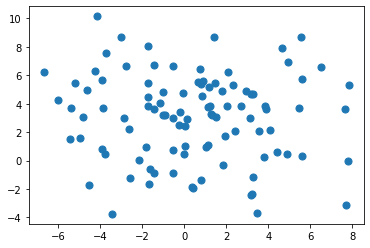

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#make_blobs documentation : 
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

x, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=3)
print(f"Each point in x contains values (feature_1,feature_2) for each point : ({round(x[0][0],2)},{round(x[0][1],2)})")
print(f"Each point in y contains values (class_of_n) for each point n in x : {y[0]}")

print()
print("Dataset before clustering :")
plt.scatter(x[:, 0], x[:, 1], s=50)
plt.show()


Dataset after clustering :


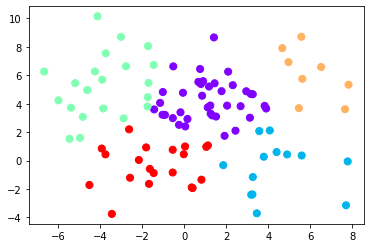

In [24]:
model = KMeans(5)
model.fit(x)
y_kmeans = model.predict(x)

print("Dataset after clustering :")

# create a acatter plot for the predictions
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='rainbow')
plt.show()

# <span style="color:purple">Code (text clustering)</span>  

In [36]:
import collections
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nithin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nithin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Here there are no labels. The algorithm will decide which cluster each sentence belongs to.  

### First we have to tokenize each sentence/text. 

In [40]:
def tokenizer(text):
    tokens = word_tokenize(text)
    # fisher -> fish ; Fishing -> fish . Stem is fish.
    stemmer = PorterStemmer() 
    #Remove words such as I, The ,Is etc.
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')] 
    return tokens

In [69]:
def cluster_sentences(sentences, nb_of_clusters=2):
    # create tf ifd again: stopwords-> we filter out common words (I,my, the, and...)
    tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer ,lowercase=True)
    # builds a tf-idf matrix for the sentences
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    kmeans = KMeans(n_clusters=nb_of_clusters)
    kmeans.fit(tfidf_matrix)
    clusters = collections.defaultdict(list)
    for i, label in enumerate(kmeans.labels_):
        clusters[label].append(i)
    return dict(clusters)

In [70]:
sentences = ["Quantuum physics is quite important in science nowadays.",
             "Software engineering is hotter and hotter topic in the silicon valley",
             "Investing in stocks and trading with them are not that easy",
             "FOREX is the stock market for trading currencies",
             "Warren Buffet is famous for making good investments. He knows stock markets"]

In [71]:
nclusters = 3
clusters = cluster_sentences(sentences, nclusters)

In [72]:
for cluster in range(nclusters):
    print(f"CLUSTER {cluster} :")
    for i, sentence in enumerate(clusters[cluster]):
        print(f"\tSENTENCE {i} : {sentences[sentence]}")

CLUSTER 0 :
	SENTENCE 0 : Investing in stocks and trading with them are not that easy
	SENTENCE 1 : FOREX is the stock market for trading currencies
	SENTENCE 2 : Warren Buffet is famous for making good investments. He knows stock markets
CLUSTER 1 :
	SENTENCE 0 : Quantuum physics is quite important in science nowadays.
CLUSTER 2 :
	SENTENCE 0 : Software engineering is hotter and hotter topic in the silicon valley


# <span style="color:darkgreen">END</span>